<table style="width:100%">
    <tr>
        <td>
            <a href="http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Geometry_of_cycles/Start_from_Basics/What_is_figure.html">
  <img src="../../svg/view-html.svg" alt="View HTML"/>
            </a>
        </td>
        <td>
<a href="https://github.com/vvkisil/MoebInv-notebooks/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_figure.ipynb">
  <img src="../../svg/open-github.svg" alt="Open In GitHub"/>
            </a>
        </td>
        <td>
            <a href="https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_figure.ipynb">
  <img src="../../svg/exec-colab.svg" alt="Run In Colab"/>
            </a>
        </td>
        <td>
            <a href="https://codeocean.com/capsule/7952650/tree">
  <img src="../../svg/code-ocean.svg" alt="Code Ocean"/>
            </a>
        </td>
    </tr>
 </table>

# What is a figure, anyway?
### [Vladimir V Kisil](http://www1.maths.leeds.ac.uk/~kisilv/)

Classic geometric constructions by compass and straightedge are implemented as *figures*. Their building blocks are [*cycles*](https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_cycle.ipynb) and the cement gluing cycles together is [*cycle relations*](http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Geometry_of_cycles/Start_from_Basics/What_is_cycle_relation.html). In short: 

**Definition.** [Ref.4](#refKisil18) [Ref.5](#refKisil19) *Figure is a collection of cycles interconnected by Mobius invariant relation.*

We illustrate the concept by a basic example below. For simplicity the entire figure is build on a (virtually) single cycle relation—[*orthogonality*](http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Geometry_of_cycles/Start_from_Basics/What_is_cycle_relation.html#CycleProduct).

**Note:** *to execute the notebook you may need to [install software](https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Introduction/Software_installation_GUI_integration.ipynb).* 

<a id="ToC"></a>
#### Table of contents of this notebook

+ [Example: the midpoint of an interval](#exampleMidpoint)
  - [Initialise figure and input given cycles](#initialisation)
  - [Add cycles by relations: parents and generations](#addCyclesRelations)
+ [Viewing, saving and using figures](#writingUsingFigure)
  - [Recording a figure](#recordingFigure)
  - [Measuring on a figure](#measuringFigure)
  - [Modifying a figure](#modifyingFigure)
+ [Further reading](#furtherReading)
+ [References](#references)

Back to the [top-level Table of Contents](https://github.com/vvkisil/MoebInv-notebooks/blob/master/Table_of_contents.md).

<a id="exampleMidpoint"></a>
## Example: the midpoint of an interval

As an illustration we are considering a construction of the midpoint of an interval. As usually, we need to load the software.

In [1]:
from figure import *
from IPython.display import Image
show_asy_off()

            Python wrappers for MoibInv Library
     ---------------------------------------------
Please cite this software as
V.V. Kisil, MoebInv: C++ libraries for manipulations in non-Euclidean geometry, SoftwareX, 11(2020),100385. doi:10.1016/j.softx.2019.100385.
     ---------------------------------------------



<a id="initialisation"></a>
### Initialise figure and input given cycles

Now we initiate our figure (with the default Euclidean metric, [Ref.1](#refKisil07) [Ref.2](#refKisil12)).

In [2]:
F=figure()

Now we define two points `A` and `B`, which are  endpoints of the interval to be bisected. 

In [3]:
A=F.add_point([0,0], "A") # Origin
B=F.add_point([1,0], "B") # Point (1,0)

The special role is played by infinity. For example, a cycle is a straight line if it passes the infinity. We can always access the infinity point of the figure as `F.get_infinity()`. However, to make our construction conformally invariant we take infinity as the third parameter of the figure. This cycle is provided by listing its all coefficients $(k, l, n, m)$, see [notebook on cycles](https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_cycle.ipynb).

In [4]:
inf=F.add_cycle(cycle_data(0, [0,0], 1), "inf", "\\infty") # Infinity

[Back to ToC](#ToC)

<a id="addCyclesRelations"></a>
### Add cycles by relations: parents and generations

Here our construction starts. We add a cycle `l` with the following properties:
+ It passes `A`, that is it is orthogonal to it.
+ It passes `B`, that is it is orthogonal to it.
+ It is a straight line, i.e it passes the infinity (that is it is orthogonal to it).

See [discussion of orthogonality](http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Geometry_of_cycles/Start_from_Basics/What_is_cycle_relation.html#aboutOrthogonality).

In [5]:
l=F.add_cycle_rel([is_orthogonal(A),
		     is_orthogonal(B),
		     is_orthogonal(inf)],
		    "l");

Cycle `l` was added through its relations to cycles `A`, `B`, and `inf`. If they are pairwise distinct, then `l` is uniquely defined and all its coefficients are numeric. If some given points coincide, then coefficients of `l` will depend on free parameter(s). Given points  `A`, `B`, and `inf` can depend on free parameters (C++ class `GiNaC::symbols`) themselves, then `l` will inherit such a dependence of course.

We say that `A`, `B`, and `inf` are *parents* of `l` to denote that `l` is defined through relations to the three given cycles. Cycles in a figure are belonging to certain generations. and predefined cycles (that is `A`, `B`, and `inf` in our example) are always in "generation-0*. We want to avoid dangerous loops in parenthood those each new cycle is assigned to the next generation for its latest (in terms of generations) parent. For example, since all parents of `l` are in generation-0, the new cycle belongs to the generation-1.  

In a similar way we add a cycle `c` passing `A` and `B` and orthogonal to `l`, this will be assigned to generation-2.

In [6]:
c=F.add_cycle_rel([is_orthogonal(A),
				is_orthogonal(B),
				is_orthogonal(l)],
		"c")

Next cycle `p` is orthogonal to `l` and `c` and is a straight line (orthogonal to `inf`), it is in generation-3. 

In [7]:
p=F.add_cycle_rel([is_orthogonal(inf),
				is_orthogonal(l),
				is_orthogonal(c)],
		"p")

Finally the midpoint is the intersection of `p` and `l`, that is it is orthogonal to these two cycles. Furthermore to be a point it shall be orthogonal to itself, which is written as `is_orthogonal()` (no other parent for this orthogonality). Equivalently, self-orthogonality can be written as `is_orthogonal()`. We shall note that `p` and `l` also intersect in point `inf`, to avoid this value we add the relation ``*to be different*'' written as `is_different(inf)`.

In [8]:
M = F.add_cycle_rel([is_orthogonal(l),
			 is_orthogonal(p),
			 is_orthogonal(), # self-orthogonality
			 is_different(inf)],
	 "midpoint")              

[Back to ToC](#ToC)

<a id="writingUsingFigure"></a>
## Viewing, saving and using figures

<a id="recordingFigure"></a>
### Recording a figure
Once the figure is constructed we may want to see its content. It is possible to print the list of cycles, their coefficients $(k,l,n.m)$, relations to parents and children (if any). 

In [9]:
print(F)

B-(0): {`0, [[1,0]]~B-(0), 2', -3} --> (B);  <-- ()
B-(1): {`0, [[0,1]]~B-(1), 0', -3} --> (B);  <-- ()
A-(1): {`0, [[0,1]]~A-(1), 0', -3} --> (A);  <-- ()
A-(0): {`0, [[1,0]]~A-(0), 0', -3} --> (A);  <-- ()
infty: {`0, [[0,0]]~infty, 1', -2} --> (A,B);  <-- ()
R: {`0, [[0,1]]~R, 0', -1} --> ();  <-- ()
inf: {`0, [[0,0]]~symbol198, 1', 0} --> (l,p,midpoint);  <-- ()
B: {`1, [[1,0]]~B, 1', 0} --> (l,c);  <-- (B/o,infty|d,B-(0)|o,B-(1)|o)
A: {`1, [[0,0]]~A, 0', 0} --> (l,c);  <-- (A/o,infty|d,A-(0)|o,A-(1)|o)
l: {`0, [[0,1]]~l, 0', 1} --> (c,p,midpoint);  <-- (A|o,B|o,inf|o)
c: {`1, [[1/2,0]]~c, 0', 2} --> (p);  <-- (A|o,B|o,l|o)
p: {`0, [[1,0]]~p, 1', 3} --> (midpoint);  <-- (inf|o,l|o,c|o)
midpoint: {`1, [[1/2,0]]~midpoint, 1/4', 4} --> ();  <-- (l|o,p|o,@|o,inf|d)
Altogether 13 cycles in 13 cycle_nodes.



For example, it says that cycle `l` has children `c`, `p` and `midpoint`—these are cycles which directly relate to `l` as a parent. The list of relations for `l` is `(A|o,B|o,inf|o)` which means orthogonality to each of the three parents.

A graphical presentation of the figure can be seen as follows. It will also save the graphic file "midpoint1.png" on the local disk. Alternative popular formats, defined by the last parameter of the call `asy_write()` can be "pdf", "eps", "jpg". 

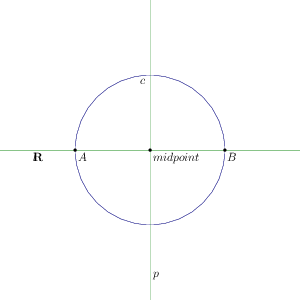

In [10]:
F.asy_write(300,-.5,1.5,-1,1,"midpoint1","png")
Image("midpoint1.png")

Alternatively we can write an [Asymptote](http://asymptote.sourceforge.net/) file can be saved on the disk. It is a human-readable command drawing script. It can be fine-tuned for the appearance and then converted to PDF/PNG/PS/JPEG formats by `asymptote` tool.

In [11]:
F.asy_print("midpoint", "", -.5,1.5,-1,1)

We also can also save the figure in a binary format (non-editable or human-read). The next command will create a local file "midpoint.gar", which can be subsequently read from a command.  For illustration of this, we will create another figure `F1` identical to the original one and show it on the screen (which shall be the same as above).

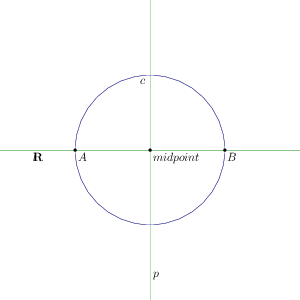

In [12]:
F.save("midpoint") # The extansion ".gar" will be automatically added
F1 = figure("midpoint")  # the actual file is named "midpoint.gar"
F1.asy_write(300,-.5,1.5,-1,1,"midpoint2","png")
Image("midpoint2.png")

The same Gar archive file can be read by Graphic User Interface  [moebinv-gui](https://sourceforge.net/projects/gui.moebinv.p/) to this software, which allows modify and study figures by mouse clicks, [Ref.6](#refKisil20).

[Back to ToC](#ToC)

<a id="measuringFigure"></a>
### Measuring on a figure
We can measure that the constructed point is the midpoint indeed. The respective quantity is known as a Steiner power:

In [13]:
def check_equality():
    Res1 = F.measure(M, A, "steiner_power")
    Res2 = F.measure(M, B, "steiner_power")

    for i in range(len(Res1)):
        print(f'Tangent distance are equal: {(Res2[i]-Res1[i]).normal().is_zero()}')

check_equality()

Tangent distance are equal: True


Here we need to run a list because a "cycle" within a figure can encapsulate several quadrics, thus the result of measurement is given by a list with answers for all respective quadrics. 

Geometrically the Steiner power is equal to the square of tangential distance between cycles. Could it be that our midpoint construction works beyond points (zero radius cycles). We can check this for the unit circle and some other circle:

In [14]:
F.move_cycle(A, cycle_data(1, [0, 0], -1)) # unit circle
F.move_cycle(B, cycle_data(1, [2, 2], 4)) # center (2.2) and the radius 2
check_equality()

Tangent distance are equal: True


We can even make a check for two generic cycles:

In [15]:
k=realsymbol("k")
l=realsymbol("l")
n=realsymbol("n")
m=realsymbol("m")

k1=realsymbol("k1", "{k'}")
l1=realsymbol("l1", "{l'}")
n1=realsymbol("n1", "{n'}")
m1=realsymbol("m1", "{m'}")

F.move_cycle(A, cycle_data(k, [l, n], m)) # unit circle
F.move_cycle(B, cycle_data(k1, [l1, n1], m1)) # center (2.2) and the radius 2

check_equality()

Tangent distance are equal: True


Thus our claim is demonstrated by analytic computations. However a synthetic geometric proof is straightforward as well.

[Back to ToC](#ToC)

<a id="modifyingFigure"></a>
### Modifying a figure

Figures are not cut in marble, instead they can be efficiently edited or transformed. For our figure an interesting feature is that midpoint is well defined not only for endpoints of an interval. In fact, `A` and `B` can be any cycles. Let us replace `A` by the unit circle (cycle $(1,0,0,-1)$) and move `B` to the point (2,1): 

In [14]:
F.move_cycle(A, cycle_data(1, [-1, 0], -1))
F.move_point(B, [2,1])

How does it look like?

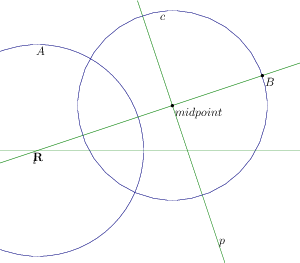

In [15]:
F.asy_write(300,-1.5,2.5,-1.5,2,"midpoint3","png")
Image("midpoint3.png")

To clarify the role of the `inf` in the midpoint construction we can make a [fractional linear transformation](http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Geometry_of_cycles/Start_from_Basics/What_is_cycle_product.html#FLT) of the entire figure 

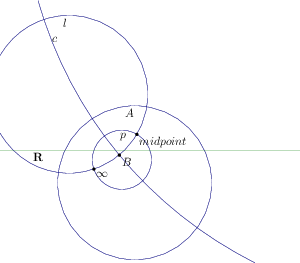

In [16]:
F.reflection(cycle2D(1, [numeric(-1,4), numeric(-1,4)], numeric(-7,8)))
F.asy_write(300,-1.5,2.5,-1.5,2,"midpoint4","png")
Image("midpoint4.png")

It is a fun to find correspondence between two pictures and mediate on the performed transformation.

Another puzzle is achieved if we change the cycle metric from Euclidean (elliptic) to hyperbolic and output the image to look which meaning does it have.

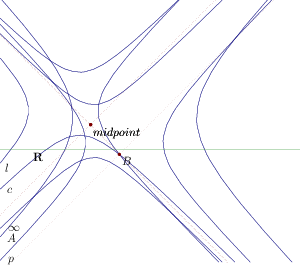

In [17]:
F.set_metric([-1,1])
F.asy_write(300,-1.5,2.5,-1.5,2,"midpoint5","png")
Image("midpoint5.png")

Finally, we may replace in our construction all Euclidean line by [Lobachevsky](http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Introduction/Euclidean_and_Lobachevsky_lines.html), that is lines will be defined by orthogonality to the real line rather than to infinity. This can be easily achieved by moving `inf` cycle to the real line:

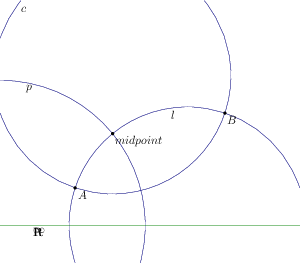

In [18]:
F.set_metric([-1,-1])
F.move_point(A, [0,.5])
F.move_point(B, [2,1.5])
F.move_cycle(inf, cycle_data(0, [0, 1], 0))
F.asy_write(300,-1,3,-.5,3,"midpoint6","png")
Image("midpoint6.png")

It can be checked that the construction indeed delivers the midpoint of the interval in the Lobachevsky half-plane geometry.

There is a plenty of space for experiments and discoveries, which is the main aim the present software.

[Back to ToC](#ToC)

<a id="furtherReading"></a>
## Further Reading

We presented a simple example of the figure which essentially based on the single cycle relations (orthogonality). Although it may cover the main geometrical properties there are is versatile set of other [cycle relations](http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Geometry_of_cycles/Start_from_Basics/What_is_cycle_relation.html). Geometric construction often require repeated sequences of operations, which can be efficiently realised by [subfigures](http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Geometry_of_cycles/Start_from_Basics/What_is_subfigure.html).

[Back to ToC](#ToC)

Back to the [top-level Table of Contents](https://github.com/vvkisil/MoebInv-notebooks/blob/master/Table_of_contents.md).

<a id="references"></a>
### References

   <a id="refKisil07"></a>
1. V.V. Kisil. *Starting with the group SL2(R).* Notices Amer. Math. Soc., [**54**(11):1458–1465](http://www.ams.org/notices/200711/tx071101458p.pdf), 2007. [arXiv:math/0607387](https://arxiv.org/abs/math/0607387), Zbl # 1137.22006.

  <a id="refKisil12"></a>
2. V.V. Kisil. *Geometry of Möbius Transformations: Elliptic, Parabolic and Hyperbolic Actions of $SL_2(\mathbb{R})$*. [Imperial College Press](https://www.worldscientific.com/worldscibooks/10.1142/p835), London, 2012. Includes a live DVD.

  <a id="refKisilMN"></a>
3. V.V. Kisil, [*MoebInv notebooks*](https://github.com/vvkisil/MoebInv-notebooks), started at 2019.

   <a id="refKisil18"></a>
4. V. V. Kisil. An extension of Mobius–Lie geometry with conformal ensembles of cycles and its implementation in a GiNaC library. Proc. Int. Geom. Cent., 11 (3):45–67, 2018. E-print: [arXiv:1512.02960](https://arxiv.org/abs/1512.02960). Project page: http://moebinv.sourceforge.net/.

   <a id="refKisil19"></a>
5. V. V. Kisil. Möbius–Lie geometry and its extension. In I. M. Mladenov, G. Meng, and A. Yoshioka (eds.) Geometry, integrability and quantization XX, pages 13–61, Bulgar. Acad. Sci., Sofia, 2019. E-print: [arXiv:1811.10499](https://arxiv.org/abs/1811.10499).

  <a id="refKisil20"></a>
6.  V. V. Kisil. *MoebInv: C++ libraries for manipulations in non-Euclidean geometry*. SoftwareX, **11**:100385, 2020. doi: [10.1016/j.softx.2019.100385](http://dx.doi.org/10.1016/j.softx.2019.100385).

[Back to ToC](#ToC)

Back to the [top-level Table of Contents](https://github.com/vvkisil/MoebInv-notebooks/blob/master/Table_of_contents.md).